In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Step 2: Calculate CCI
def calculate_cci(data, window=20):
    # Calculate Typical Price (TP)
    data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
    
    # Calculate SMA of Typical Price
    data['SMA'] = data['Typical Price'].rolling(window=window).mean()
    
    # Calculate Mean Deviation
    data['Mean Deviation'] = data['Typical Price'].rolling(window=window).apply(
        # lambda x: pd.Series(x).mad(), raw=True
        lambda x: np.mean(np.abs(x - np.mean(x))), raw=True
    )
    
    # Calculate CCI
    data['CCI'] = (data['Typical Price'] - data['SMA']) / (0.015 * data['Mean Deviation'])
    
    return data

In [11]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2024-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply the CCI calculation
    data = calculate_cci(data)
    
    # Step 3: Plot CCI
    plt.figure(figsize=(14, 7))
    
    # Plot the CCI
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(data['CCI'], label='CCI', color='purple')
    plt.axhline(100, color='red', linestyle='--', label='Overbought (+100)')
    plt.axhline(-100, color='green', linestyle='--', label='Oversold (-100)')
    plt.title('Commodity Channel Index (CCI)')
    plt.xlabel('Date')
    plt.ylabel('CCI')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


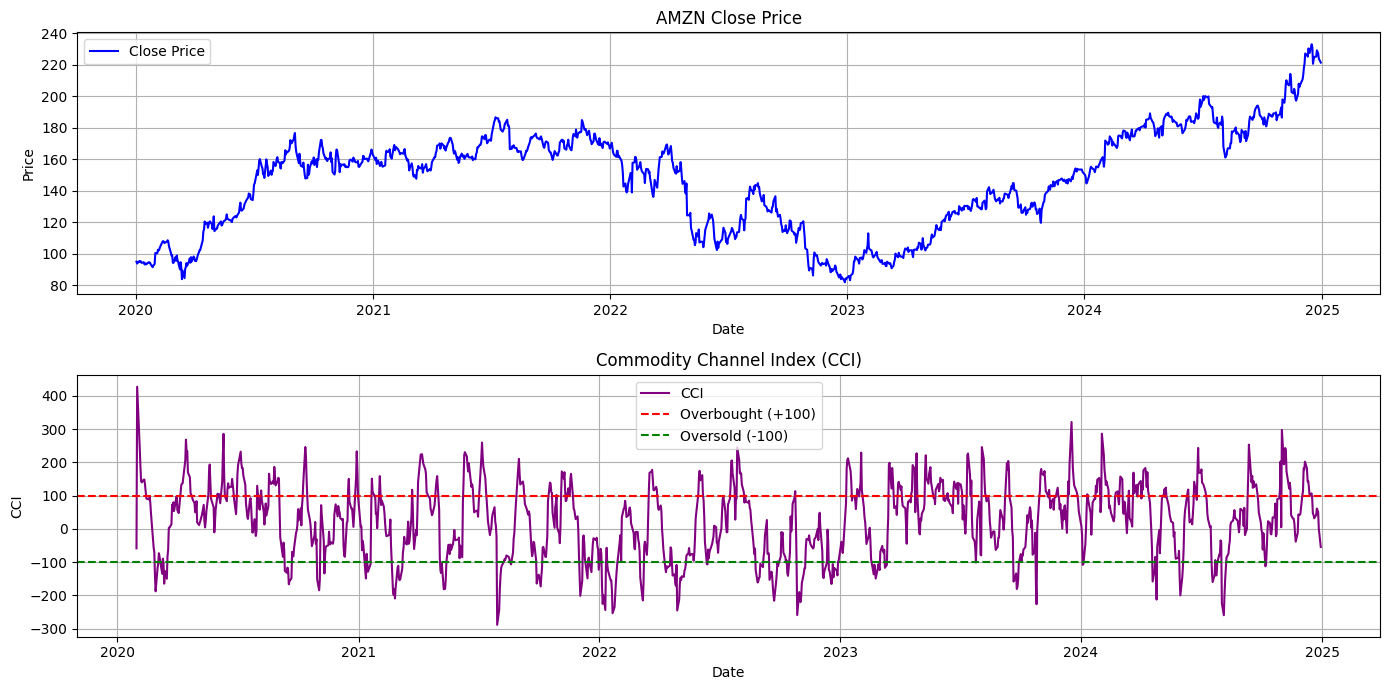

In [12]:
show_graph("AMZN")